<a href="https://colab.research.google.com/github/450fausto/Productivity/blob/main/Proyecto_Fase3_mod2_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEDU: Data Science 3 (Santander Universidades)**
# *Machine Learning*

## Predicción de Productividad en Empleados de la Industria Textil

__Equipo 1__

El equipo de colaboradores en este trabajo está compuesto por:
- __Gómez Barraza__, Karla Daniela
- __Guevara Moreno__, Fernando
- __Muñoz Esparza__, José Cruz
- __Rodríguez Rivera__, Gil Estéfano
- __Rosado Martínez__, Ana Elizabeth

# Postwork 1

El objetivo de este postwork es definir el proyecto que se estará desarrollando a lo largo del Módulo de Machine Learning. 
Durante este bloque se eligió trabajar con el Dataset *Productivity Prediction of Garment Employees*, obtenido de la plataforma *Kaggle*, mismo que se puede visualizar en el siguiente [link](https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees).
Este Dataset nos permitirá hacer un análisis predictivo sobre la productividad de los empleados en la industria textil.

In [28]:
# Se importan las librerías para el análisis y operacion con datos
import pandas as pd
import numpy as np

# Para graficar y hacer visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de ML y utilidades
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
# Se lee el dataset a utilizar
df=pd.read_csv('https://raw.githubusercontent.com/450fausto/Productivity/main/garments_worker_productivity.csv')

# Descripción del dataset

In [3]:
# Se hace el análisis exploratorio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.date.unique()

array(['1/1/2015', '1/3/2015', '1/4/2015', '1/5/2015', '1/6/2015',
       '1/7/2015', '1/8/2015', '1/10/2015', '1/11/2015', '1/12/2015',
       '1/13/2015', '1/14/2015', '1/15/2015', '1/17/2015', '1/18/2015',
       '1/19/2015', '1/20/2015', '1/21/2015', '1/22/2015', '1/24/2015',
       '1/25/2015', '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015',
       '1/31/2015', '2/1/2015', '2/2/2015', '2/3/2015', '2/4/2015',
       '2/5/2015', '2/7/2015', '2/8/2015', '2/9/2015', '2/10/2015',
       '2/11/2015', '2/12/2015', '2/14/2015', '2/15/2015', '2/16/2015',
       '2/17/2015', '2/18/2015', '2/19/2015', '2/22/2015', '2/23/2015',
       '2/24/2015', '2/25/2015', '2/26/2015', '2/28/2015', '3/1/2015',
       '3/2/2015', '3/3/2015', '3/4/2015', '3/5/2015', '3/7/2015',
       '3/8/2015', '3/9/2015', '3/10/2015', '3/11/2015'], dtype=object)

In [5]:
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Aquí vemos que 'finishing' y 'finishing ' sólo se diferencian por el espacio al final, así que procedemos a eliminar ese espacio. 

In [6]:
df.department=pd.Series(map(lambda x: x.strip(), df.department))

In [7]:
df.department.unique()

array(['sweing', 'finishing'], dtype=object)

In [8]:
df.day.unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [9]:
np.sort(df.team.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [10]:
np.sort(df.targeted_productivity.unique())

array([0.07, 0.35, 0.4 , 0.5 , 0.6 , 0.65, 0.7 , 0.75, 0.8 ])

In [11]:
np.sort(df.smv.unique())

array([ 2.9 ,  3.9 ,  3.94,  4.08,  4.15,  4.3 ,  4.6 ,  5.13, 10.05,
       11.41, 11.61, 12.52, 14.61, 14.89, 15.09, 15.26, 15.28, 16.1 ,
       18.22, 18.79, 19.31, 19.68, 19.87, 20.1 , 20.2 , 20.4 , 20.55,
       20.79, 21.25, 21.82, 21.98, 22.4 , 22.52, 22.53, 22.94, 23.41,
       23.54, 23.69, 24.26, 25.31, 25.9 , 26.16, 26.66, 26.82, 26.87,
       27.13, 27.48, 28.08, 29.12, 29.4 , 30.1 , 30.33, 30.4 , 30.48,
       31.83, 38.09, 40.99, 41.19, 42.27, 42.41, 42.97, 45.67, 48.18,
       48.68, 48.84, 49.1 , 50.48, 50.89, 51.02, 54.56])

In [12]:
df.wip.isna().sum()


506

In [13]:
df.wip=df.wip.fillna(value=0.0)

In [14]:
df.wip.isna().sum()

0

In [15]:
df.over_time.unique().dtype

dtype('int64')

In [16]:
np.sort(df.incentive.unique())

array([   0,   21,   23,   24,   25,   26,   27,   29,   30,   32,   33,
         34,   35,   37,   38,   40,   44,   45,   46,   49,   50,   53,
         54,   55,   56,   60,   62,   63,   65,   69,   70,   75,   81,
         88,   90,   93,   94,   98,  100,  113,  119,  138,  960, 1080,
       1200, 1440, 2880, 3600])

In [17]:
np.sort(df.idle_time.unique())

array([  0. ,   2. ,   3.5,   4. ,   4.5,   5. ,   6.5,   8. ,  90. ,
       150. , 270. , 300. ])

In [18]:
np.sort(df.idle_men.unique())

array([ 0, 10, 15, 20, 25, 30, 35, 37, 40, 45])

In [19]:
df.no_of_style_change.unique()

array([0, 1, 2])

In [20]:
np.sort(df.no_of_workers.unique())

array([ 2. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 14. ,
       15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 24. , 25. , 26. ,
       27. , 28. , 29.5, 30.5, 31. , 31.5, 32. , 33. , 33.5, 34. , 35. ,
       38. , 39. , 42. , 44. , 45. , 46. , 47. , 48. , 49. , 50. , 51. ,
       51.5, 52. , 53. , 54. , 54.5, 55. , 55.5, 56. , 56.5, 57. , 57.5,
       58. , 58.5, 59. , 59.5, 60. , 89. ])

In [21]:
df.actual_productivity.unique().dtype

dtype('float64')

## Descripción de las columnas

- date: La fecha en formato MM-DD-YYYY
- quarter: la porción del mes. Un mes dividido en cuatro partes
- department: Departamento asociado a la instancia
- team: Número de equipo
- targeted_productivity: Target productivity para cada equipo y para cada día
- smv: Standard Minute Value, es el tiempo asignado para una tarea
- wip: Work in progress. Incluye el número de artículos sin terminar
- over_time: Representa la cantidad de tiempo extra por cada equipo en minutos
- incentive: Representa la cantidad de incentivo financiero (en BDT) que permite o motiva un curso de acción en particular.
- idle_time: La cantidad de tiempo en que la producción fue interrumpida debido a diversas razones 
- idle_men: Cantidad de trabajadores inactivos debido a una interrupción
- no_of_style_change: Número de cambios de estilo
- no_of_workers: Número de trabajadores por equipo
- actual_productivity: El valor de productividad real que varía
de 0.0 a 1.0



In [22]:
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [23]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Postwork 2

La intención de este postwork es crear módulos de separación, evaluación y validación de algoritmos de Machine Learning. El módulo MLUtilities se puede encontrar en el siguiente [Notebook](https://colab.research.google.com/drive/1lvk9P-tE73ORJYZCYEC8zCSAPq1KpcVv#scrollTo=wfxXRPatCOw7).

# Postwork 3

- Evalúa si tu proyecto puede resolverse con un algoritmo no supervisado. Recuerda que puede que las clases y categorías que obtengas no sean las que esperas. Pregúntate si el proyecto se verá beneficiado con la agrupación por clústeres.
- Si es el caso, primero enuncia qué es lo que deseas lograr: recuerda que de nada sirve el mejor algoritmo de Machine Learning si no tienes idea de lo que quieres obtener.
- Lleva tu bitácora de experimentos y prueba si te funciona el variar la cantidad de clústeres: ¿Tener menos clústeres te da mejores resultados? ¿Tener más clústeres te ayuda a tomar mejores decisiones?
- Construye tu proyecto con Jupyter Notebook. Utiliza lo que vimos en esta clase para ello. Una vez que has probado que funciona adecuadamente, haz un archivo de Python 3 con la configuración elegida y el proyecto elegido. - Recuerda que necesitarás presentar evidencias de que tu hipótesis se respondió.


Se tiene como hipótesis que el incentivo financiero mejora la productividad. Primero, se elabora un mapa de calor para visualizar la correlación existente entre las variables. 

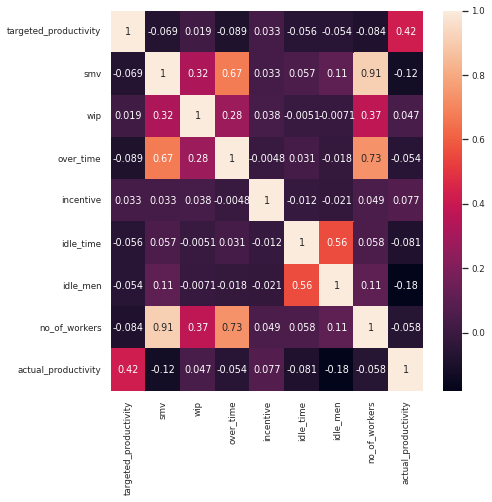

In [ ]:
df_corr=df[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']].corr()
sns.set(style='white', font_scale=0.8, rc={'figure.figsize':(7,7)})
sns.heatmap(df_corr, annot=True)

Con este mapa de calor se puede observar que la correlación no existe. Sin embargo, se debe de considerar que existen dos departamentos encargados del acabado del producto: de costura y de finalización. Las proporciones de los datos que corresponden a cada departamento se muestran a continuación mediante un gráfico circular.

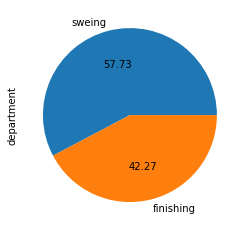

In [ ]:
df.department.value_counts().plot(kind='pie', autopct="%.2f")

Por esta razón, separar el conjunto de datos por estas dos variables es una acción necesaria.

In [24]:
df_sweing=df[df.department=='sweing']
df_finishing=df[df.department=='finishing']

Ahora, realizando un mapa de calor para los datos correspondientes a cada variable se obtiene lo siguiente:

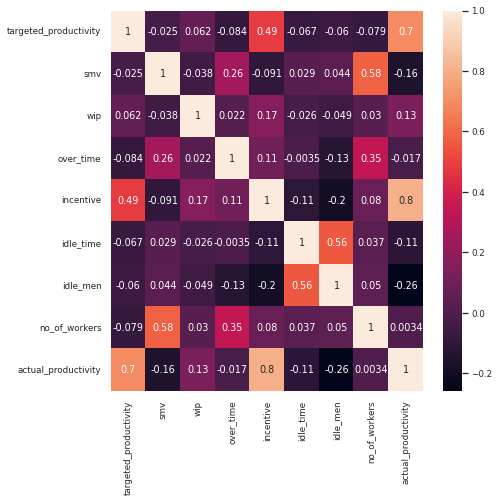

In [ ]:
# Departamento de costura
df_sweing_corr=df_sweing[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']].corr()
sns.set(style='white', font_scale=0.8, rc={'figure.figsize':(7,7)})
sns.heatmap(df_sweing_corr, annot=True)

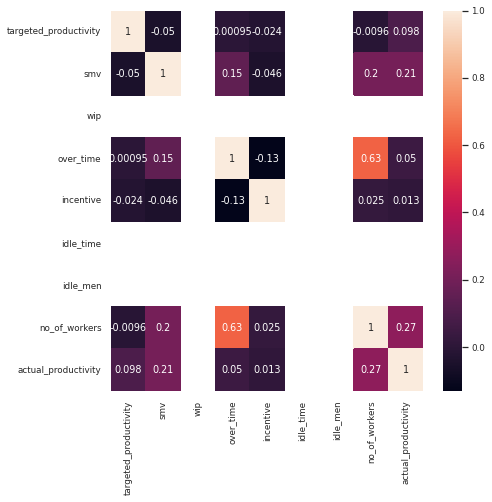

In [ ]:
# Departamento de acabado
df_finishing_corr=df_finishing[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']].corr()
sns.set(style='white', font_scale=0.8, rc={'figure.figsize':(7,7)})
sns.heatmap(df_finishing_corr, annot=True)

Con esto se demuestra, parcialmente, que la hipótesis es correcta sólo para un departamento: el de costura. Sin embargo, en el mapa de calor se puede ver otro tipo de correlación para el mismo departamento. Se trata de las variables 'targeted_productivity' (relacionado con la importancia de realizar ciertas tareas) y la productividad. 

Text(0.5, 1.0, 'Targeted productivity vs Actual productivity')

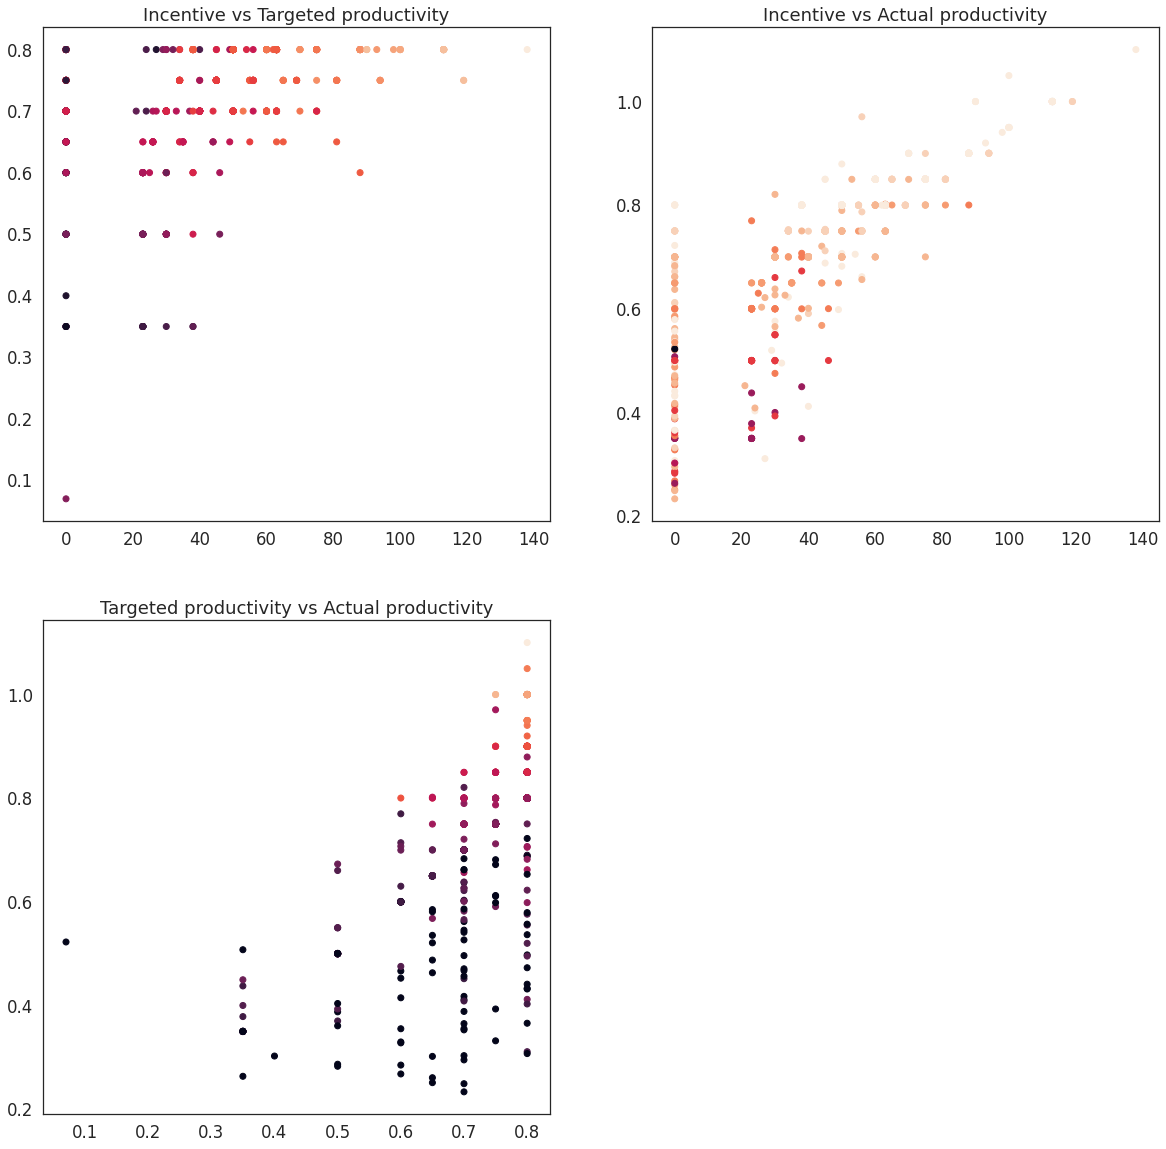

In [ ]:
plt.figure()
sns.set(style='white', font_scale=1.5, rc={'figure.figsize':(20,20)})
plt.subplot(2,2,1)
plt.scatter(df_sweing.incentive, df_sweing.targeted_productivity, c=df_sweing.actual_productivity)
plt.title('Incentive vs Targeted productivity')


plt.subplot(2,2,2)
plt.scatter(df_sweing.incentive, df_sweing.actual_productivity, c=df_sweing.targeted_productivity)
plt.title('Incentive vs Actual productivity')

plt.subplot(2,2,3)
plt.scatter(df_sweing.targeted_productivity, df_sweing.actual_productivity, c=df_sweing.incentive)
plt.title('Targeted productivity vs Actual productivity')

No obstante, la relación planteada desde la hipótesis es más evidente. Por esta razón, tales variables son consideradas para el proceso de clusterización. 

In [ ]:
X=df_sweing[['incentive', 'actual_productivity']]

El descenso del valor de la función objetivo se muestra en la siguiente Tabla. A su vez, se agrega una columna "p-%" la cuál muestra el descenso como un porcentaje. Aquí, el valor más alto representa el 100%.

In [ ]:
var = []
for i in range(1,10):
	kmeans=KMeans(n_clusters=i, init='k-means++', random_state=13)
	kmeans.fit(X)
	var.append(kmeans.inertia_)
pd.DataFrame({'Fobj':var, 'p-%':100*np.array(var)/var[0]}, index=np.arange(1,len(var)+1))

,Fobj,p-%
1,525501.089759,100.000000
2,215388.435290,40.987248
3,95512.703433,18.175548
4,44460.478922,8.460587
5,22703.388178,4.320331
6,13550.645212,2.578614
7,9072.848945,1.726514
8,5722.063628,1.088878
9,4466.531698,0.849957


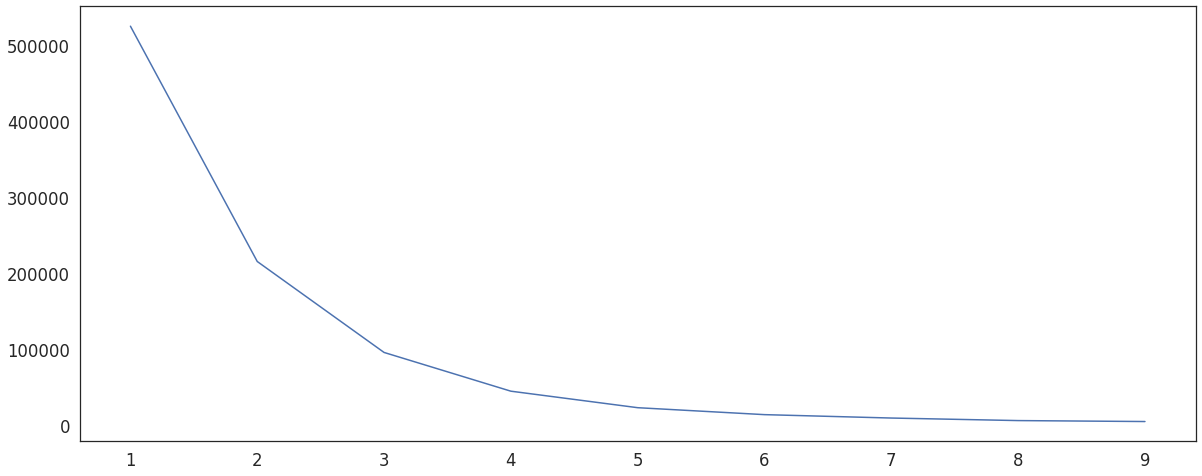

In [ ]:
plt.plot(range(1,len(var)+1), (var))

Ya sea considerando la Tabla o el método del codo, nos inclinamos por usar 3 clusters. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


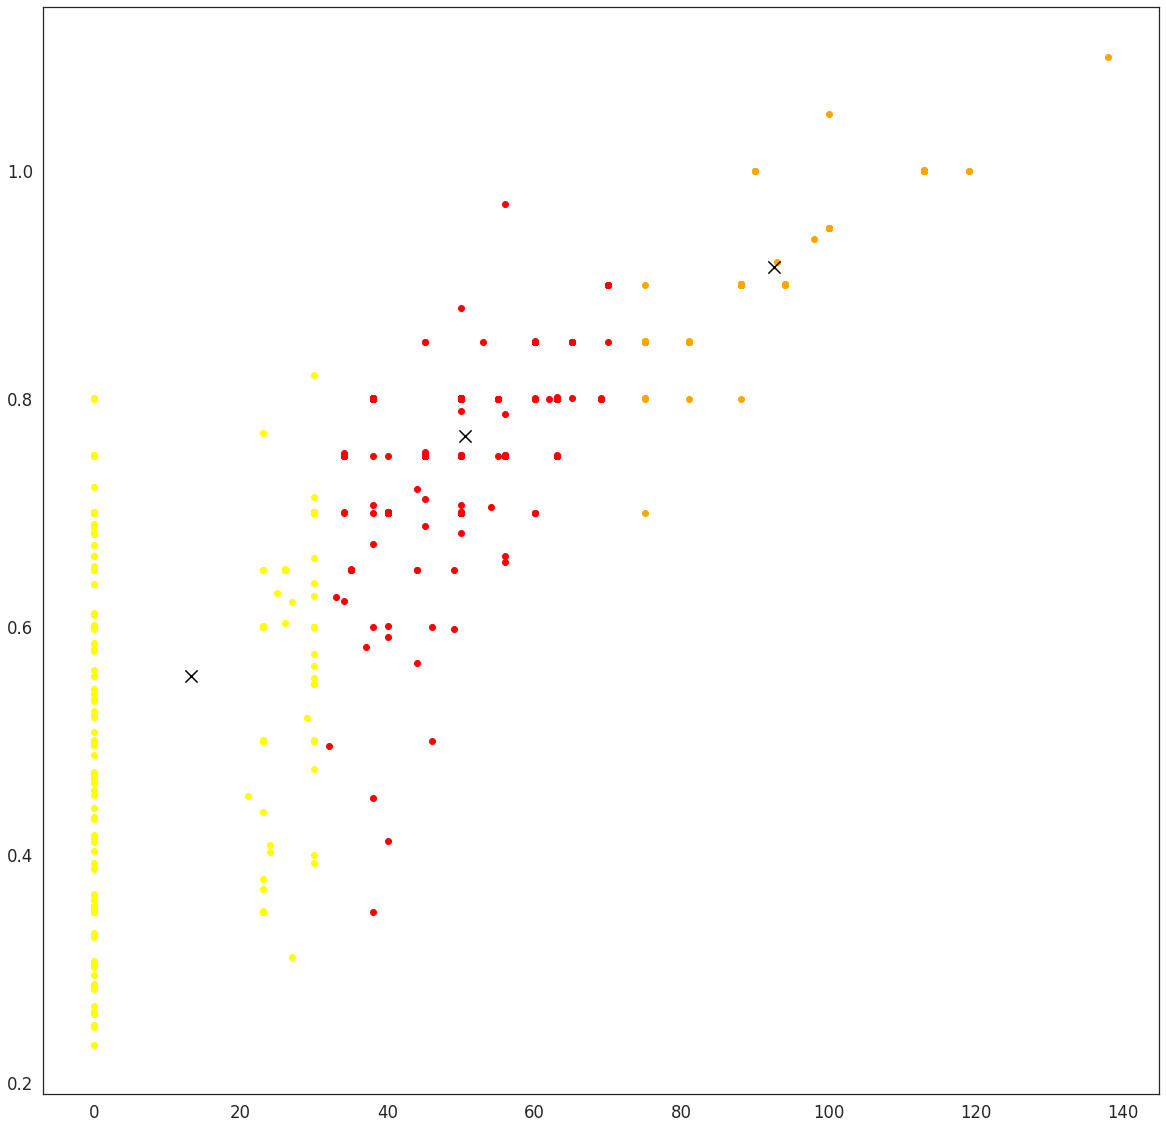

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
clusters=kmeans.fit_predict(X)
df_sweing['label']=clusters

plt.scatter(df_sweing.incentive[df_sweing.label==0], df_sweing.actual_productivity[df_sweing.label==0], color='yellow')
plt.scatter(df_sweing.incentive[df_sweing.label==1], df_sweing.actual_productivity[df_sweing.label==1], color='orange')
plt.scatter(df_sweing.incentive[df_sweing.label==2], df_sweing.actual_productivity[df_sweing.label==2], color='red')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='x', s=150)

# Postwork 4

- Evalúa si tu proyecto puede resolverse con un algoritmo de regresión. Si tu problema requiere que los datos vayan a ciertas categorías, puede que un algoritmo de regresión lineal no te sea tan útil. En cambio, si lo que necesitas es predecir cierta salida con base en múltiples entradas, o si necesitas predecir cierto dato con base en N datos anteriores, la regresión es tu herramienta.

- Ahora que sabes que tu problema puede resolverse con un algoritmo de regresión, primero construye un dataset de entrenamiento y uno de prueba, con tus funciones de MLUtilities. Puede que tengas que agregar funciones de MLUtilities nuevas, sobre todo si manejas series de tiempo. Utiliza los ejemplos y los retos para auxiliarte.

- Lleva tu bitácora de experimentos y prueba variar la cantidad de datos de entrenamiento y de prueba. También prueba cómo te funciona el utilizar una función lineal, polinomial de grado 2, grado 3 o grado 4. Puedes intentar con más grados si lo deseas, pero asegúrate de que mejore el desempeño antes de agregar grados.

- A veces, solamente un dato en una serie de tiempo no te da respuestas satisfactorias. Por ejemplo, calcular el clima de un día dados los climas anteriores puede darte un resultado aceptable, pero si combinas varias series de tiempo en un regresor lineal, ¡puede que tu desempeño mejore! no tengas miedo de combinar series de tiempo, siempre y cuando mantengas un orden.

En el Postwork 3 pudo verse que hay un par variables que tienen coeficientes de correlación de 0.7 y 0.8 al revisar su relación con el desempeño real del equipo de costura. Con estas variables, se realizará un modelo de regresión lineal múltiple que permita predecir el desempeño del equipo de costura. 

In [27]:
# NO SUPIMOS CÓMO INCORPORAR DESDE COLAB EL MLUtilities, para que se actualice
# automáticamente, por eso, de momento vamos a copiar y pegar las funciones
# que se requieren y listo
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, x_temp, y_train, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

In [29]:
# En este caso, se van a realizar un modelo de regresión lineal para buscar predecir
# la productividad del equipo de costura en términos de las variables que tienen
# una correlación alta con esa variable (esas matrices de correlación se
# encuentran en el postwork 3)
X = df_sweing[["incentive", "targeted_productivity"]]
y = df_sweing["actual_productivity"]

In [30]:
# Se realiza la separación del dataset en conjunto de entrenamiento
# y conjunto de prueba
X_train, X_test, y_train, y_test = particionar(X, y, 0.7, 0, 0.3)

In [32]:
# Se define y ajusta la regresión lineal
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Una vez entrenado el modelo de regresión, se evaluará.

In [33]:
# Se evalúan las predicciones con el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

# Se evalúan las predicciones con el conjunto de prueba
y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.005338808024107866
Pruebas: MSE =0.005915577481604133


In [37]:
# Se evalúan las predicciones con el conjunto de entrenamiento
R2 = r2_score(y_train,y_train_predict)
print("Entrenamiento: R2 ="+str(R2))

# Se evalúan las predicciones con el conjunto de prueba
R2 = r2_score(y_test, y_test_predict)
print("Pruebas: R2 ="+str(R2))

Entrenamiento: R2 =0.7660625693781395
Pruebas: R2 =0.7751616840540448


Para comenzar, puede verse que el MSE no es muy alto. Sin embargo, las variables que se busan predecir se encuentran en el intervalo de 0 a 1, aproximadamente, por lo que ahí puede haber cierta ambigüedad sobre la relevancia de ese error. El orden de magnitud de los datos es de 0.1. En consecuencia, el error relativo es del orden del 0.5%. Parece que es un buen modelo.

Otra métrica es el coeficiente de determinación $R^2$, que en este caso parece estar en torno a 0.77. Esto sugiere que es un buen modelo. A su vez, también se puede calcular la raíz del coeficiente de determinación para estimar el coeficiente de correlación del modelo: es de 0.88. Esto significa que la correlación del nuevo modelo con el par de variables produce mejores reusltados que las variables individuales.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


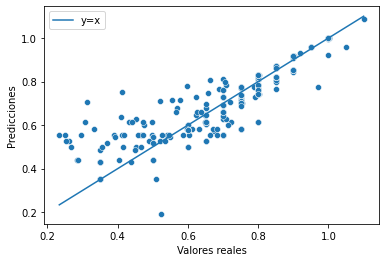

In [36]:
# Se grafican las predicciones del conjunto de entrenamiento contra los
# valores reales ppara revisar si hay overfitting
sns.scatterplot(y_train, y_train_predict);
plt.plot(np.linspace(y_train.min(),y_train.max()),
         np.linspace(y_train.min(),y_train.max()), label="y=x")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


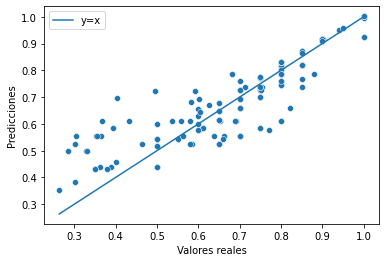

In [35]:
# Se grafican las predicciones del conjunto de prueba contra los valores reales
sns.scatterplot(y_test, y_test_predict);
plt.plot(np.linspace(y_test.min(),y_test.max()),
         np.linspace(y_test.min(),y_test.max()), label="y=x")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()

plt.show()